In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import io
import requests


import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
#import all the necessary liabriries requried if needed with insert more 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape
#907 rows & 27 columns

(907, 27)

In [4]:
df.info()
#Some of feature are with object datatypes and other with float.
#other_fuel3,other_fuel2,generation_gwh13,wepp_id,other_fuel2 ,generation_gwh_2019 estimated_generation_gwh are empty columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [5]:
df.isin(['','NA','-']).sum()
#No whitespace, NA, '-' exist in dataset

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
other_fuel2                 0
other_fuel3                 0
commissioning_year          0
owner                       0
source                      0
url                         0
geolocation_source          0
wepp_id                     0
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_gwh_2019         0
generation_data_source      0
estimated_generation_gwh    0
dtype: int64

In [6]:
df.duplicated().sum()
# This will check if any duplicate entry or duplicate row with same value exist

0

In [7]:
#Lot of missing data in certain columns.
#Lot of Non relevant data 

#At end data need to clean and we will try to do some feature engineering.

In [8]:
#Before checking null value and missing value imputation , first remove empty columns and non relevalent columns.
#Columns we are going remove are :
#country ,country_long non relevalent info
#estimated_generation_gwh - Empty
#other_fuel2 - 98% data missing
#other_fuel3 - Empty
#year_of_capacity_data - Missing data with single unique value
#gppd_idnr -non relevalent info
#generation_gwh_2019 empty
#wepp_id,owner,url,other_fuel3 empty column
#generation_gwh_2019

In [9]:
df.drop(columns=["country","country_long",'year_of_capacity_data',
                 'gppd_idnr','other_fuel2',
                 'estimated_generation_gwh','generation_gwh_2019','wepp_id','owner','url','other_fuel3','generation_gwh_2013'],axis=1,inplace=True)

In [10]:
df.isnull().sum()

name                        0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
other_fuel1               709
commissioning_year        380
source                      0
geolocation_source         19
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [11]:
#As  source is categorical data we can impute it with mode of category.
#longitude and latitude can be impute with mean or median of longitude and latitude. 
#generation_data_source almost half of the data is missing son 
#There are 5 Different columns of GenerationGW-Hours for year 2013 to 2018. Its dive into it further
#Other_fuel1 is another feature of some importance with missing value
#As it is categorical feature we can impute these powerplant with "Not Applicable".

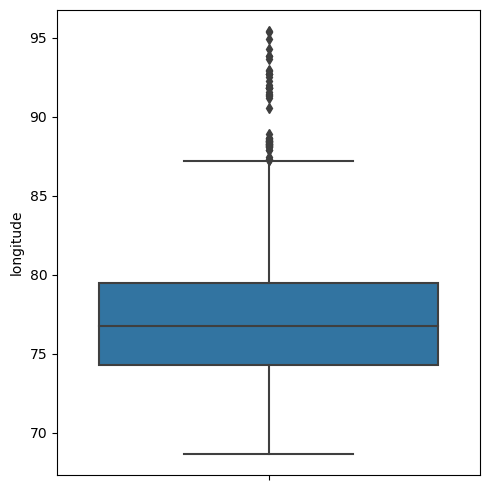

In [12]:
plt.figure(figsize=(5,5))
sns.boxplot(y='longitude',data=df)
plt.ylabel('longitude')
plt.tight_layout()
plt.show()
#will impute outlier with median

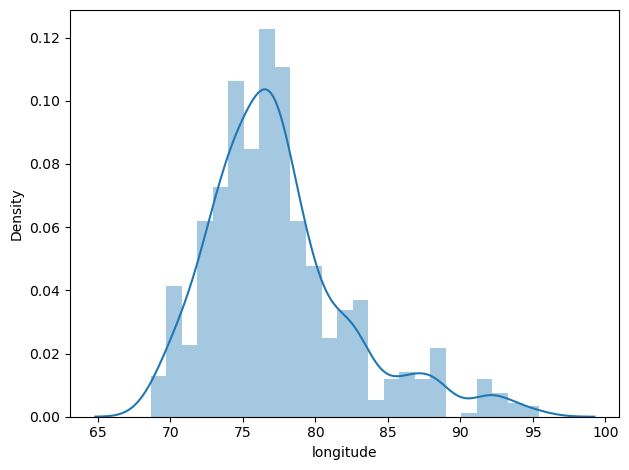

In [13]:
sns.distplot(df['longitude'])
plt.xlabel('longitude')
plt.tight_layout()
plt.show()

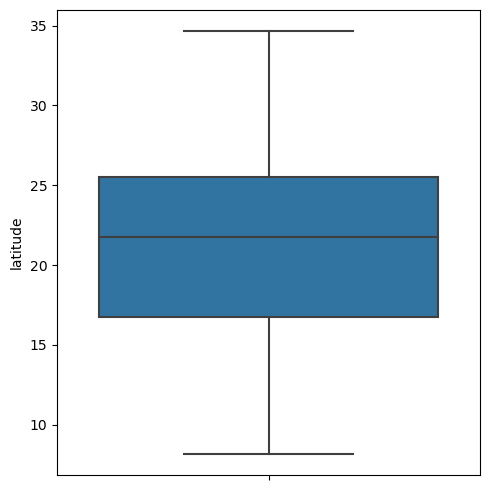

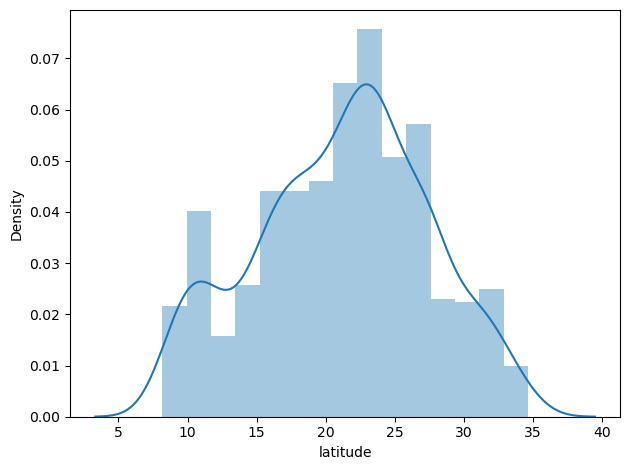

In [14]:
plt.figure(figsize=(5,5))
sns.boxplot(y='latitude',data=df)
plt.ylabel('latitude')
plt.tight_layout()
plt.show()
sns.distplot(df['latitude'])
plt.xlabel('latitude')
plt.tight_layout()
plt.show()
#Based on absense of outliers we will impute latitude we with mean

In [15]:
df['geolocation_source'] =df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
# Missing Value Imputation of geolocation with mode

# Missing Value Imputation of latitude with median
df['longitude'] =df['longitude'].fillna(df['longitude'].median())

# Missing Value Imputation of latitude with mean
df['latitude'] =df['latitude'].fillna(df['latitude'].mean())

In [16]:
df.isnull().sum()
#all theree null value has been filled

name                        0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1               709
commissioning_year        380
source                      0
geolocation_source          0
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [17]:
df.describe()
#Bigest Powerplant has power generation capacity of 4760 MW.
#In each Generation-GWHours columns Mean is greater than Median.
#Powerplants are located in latitude range of 8.1689 to 34.6490 while longitudal range is 68.64 to 95.4080.
#Median of capacity MW is 60 MW. This suggest that there are lot of small capacity powerplant in datast.

,capacity_mw,latitude,longitude,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,527.000000,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.427103,1997.091082,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.079148,4.815073,17.082868,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,1988.000000,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.281800,76.719500,2001.000000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.176450,79.206100,2012.000000,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [18]:
#We have two different Target feature for regression and classification model. LetStart exploring both Target Feature

In [19]:
df.loc[df.capacity_mw==0]
#lowest is Tata BP - Electronics City Solar Panel Plant with capacity of 0 MW

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
829,Tata BP - Electronics City Solar Panel Plant,0.0,12.8491,77.6752,Solar,NaN,NaN,Tata BP Solar India Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
df.loc[df.capacity_mw==4760]
#biggest one is VINDH_CHAL STPS with Power generation capacity of 4760 MW.

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
880,VINDH_CHAL STPS,4760.0,24.0983,82.6719,Coal,Oil,2002.0,Central Electricity Authority,WRI,27594.0,29047.0,30015.0,35116.0,35136.0,Central Electricity Authority


In [21]:
df.loc[df.capacity_mw>1500].shape
#There only 15 powerplant of capacity more than 1500 MW.

(39, 15)

In [22]:
pd.crosstab(df['capacity_mw'],df["primary_fuel"], margins=True).T

capacity_mw,0.0,1.0,1.5,1.7,1.8,2.0,2.1,2.25,2.4,2.5,...,2630.0,2920.0,2980.0,3000.0,3300.0,3960.0,4000.0,4620.0,4760.0,All
primary_fuel,,,,,,,,,,,,,,,,,,,,,
Biomass,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,50
Coal,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,1,1,1,1,1,258
Gas,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,69
Hydro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,251
Nuclear,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
Oil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
Solar,1,17,0,0,1,6,2,0,0,1,...,0,0,0,0,0,0,0,0,0,127
Wind,0,1,3,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,123
All,1,18,3,2,1,6,2,1,1,1,...,1,1,1,2,1,1,1,1,1,907


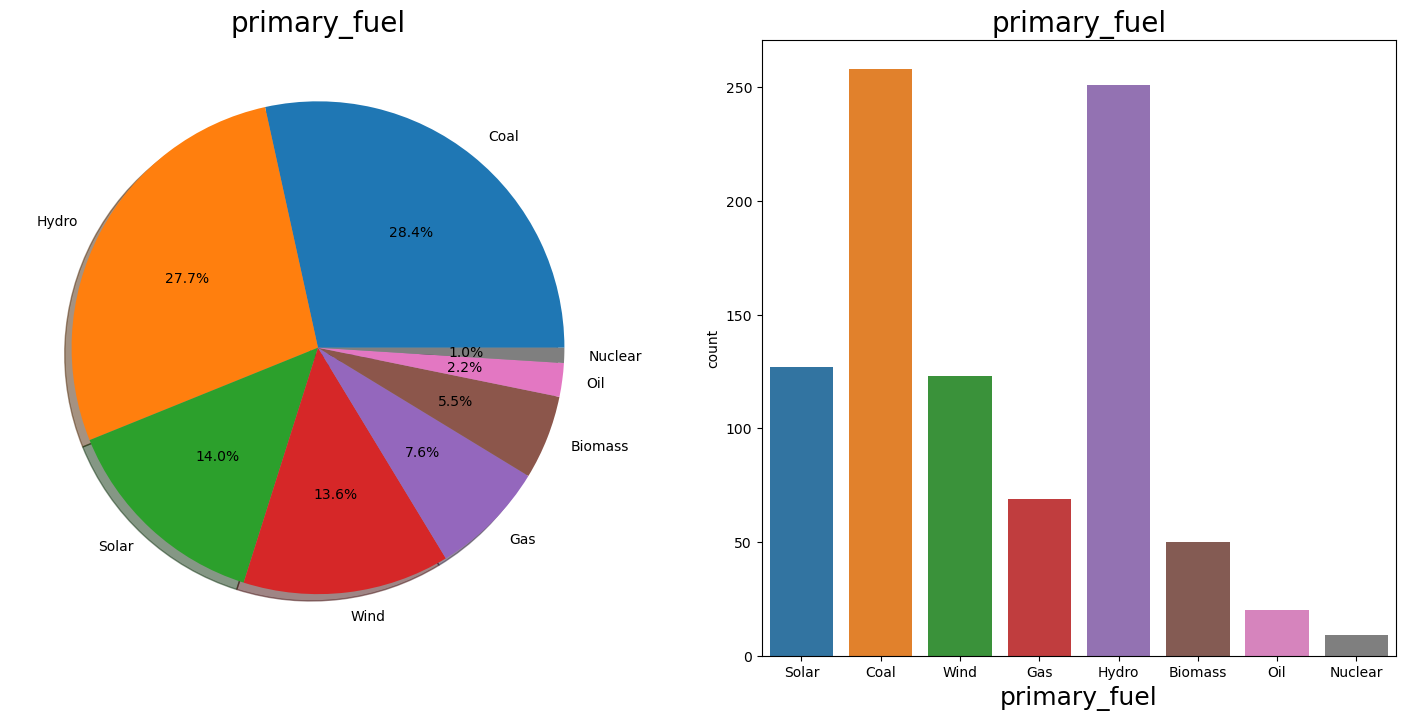

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20)
ax[0].set_ylabel('')
sns.countplot('primary_fuel',data=df,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20)
ax[1].set_xlabel("primary_fuel",fontsize=18)
plt.show()

In [24]:
df.primary_fuel.value_counts()
#there are only 9 Nuclear powerplant. Usually these powerplant build for high capacity.
#Maximum Number of powerplant are coal based powerplant followed by Hydro energy based powerplants.

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [25]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])
#Out of Total PowerGeneration Maximum comes from Coal.

,sum
primary_fuel,
Biomass,1003.260
Coal,205839.220
Gas,25172.506
Hydro,46441.770
Nuclear,8780.000
Oil,1778.840
Solar,2757.500
Wind,4111.850


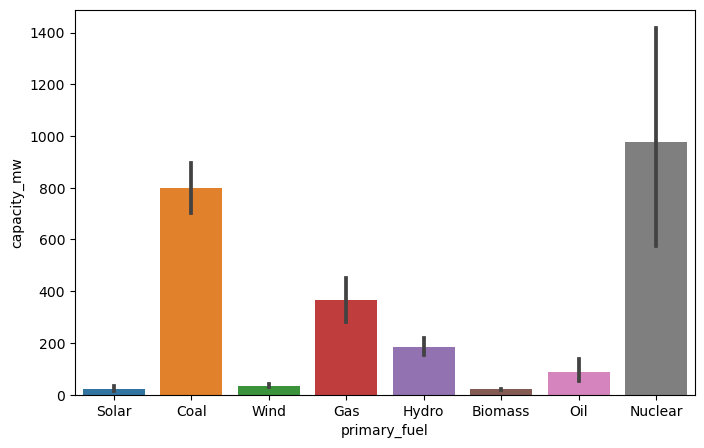

In [26]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (8,5))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.show()
#Above result is obvious as only 9 Nuclear powerplant so its mean Capacity is higher.

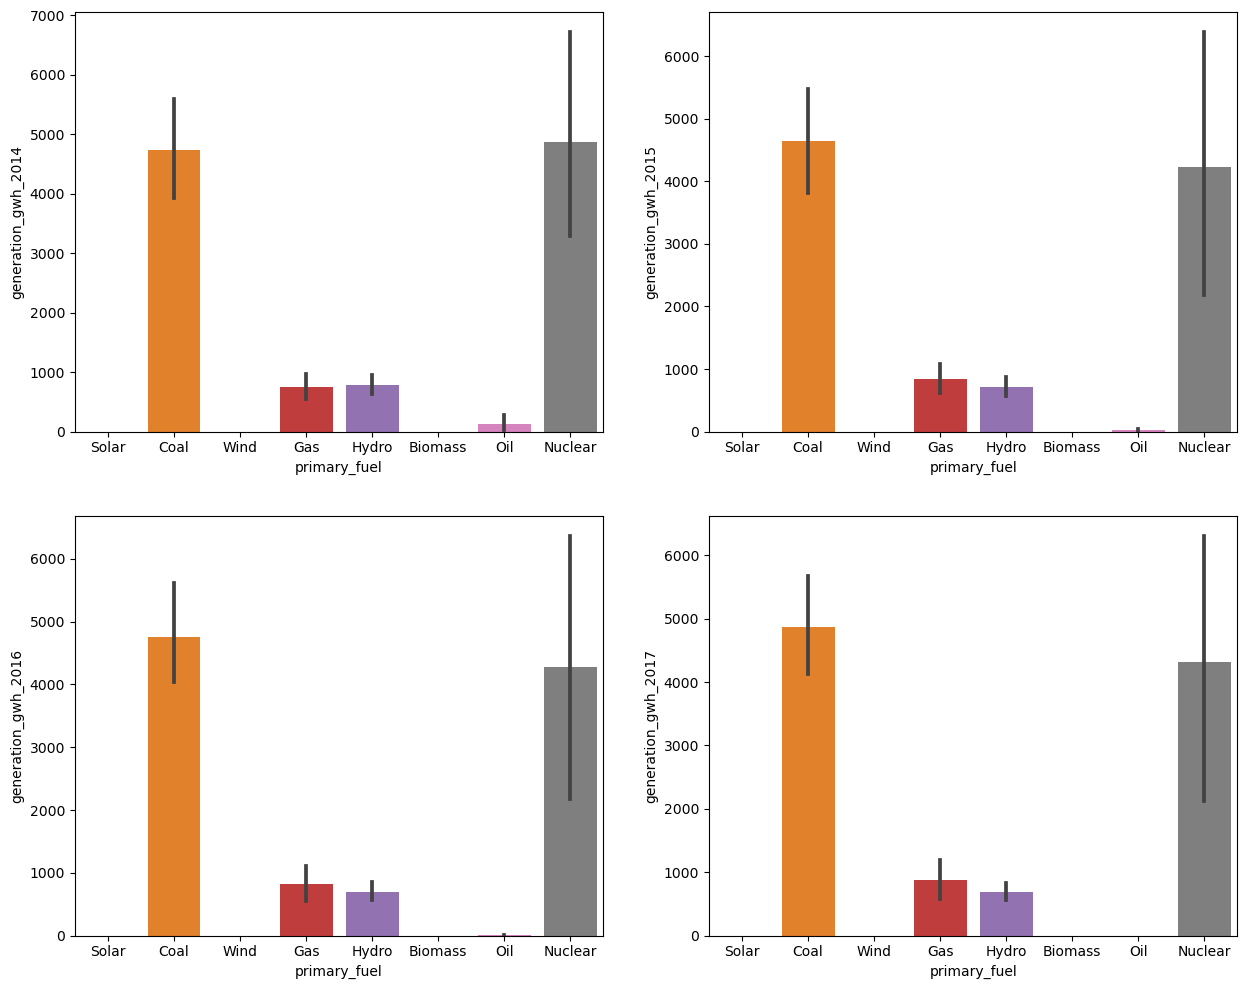

In [27]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,0],data=df)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[0,1],data=df)

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,0],data=df)

# Checking generation growth in 2017
sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[1,1],data=df)

plt.show()

In [28]:
#From the graph we can see that Nuclear has high mean electrical generation reports for all the years followed by Coal.
#Reason is high efficieny of Nuclear powerplants.
#Other fuel types have very less contribution to power generation.

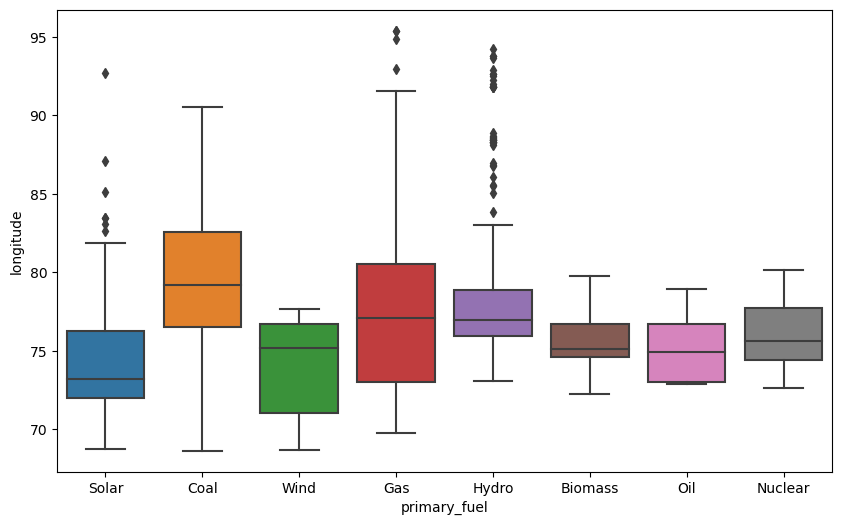

In [29]:
# Let's check how the primary_fuel is reated to longitude of the power plant
plt.figure(figsize=[10,6])
a = sns.boxplot(df['primary_fuel'],df["longitude"])
plt.show()

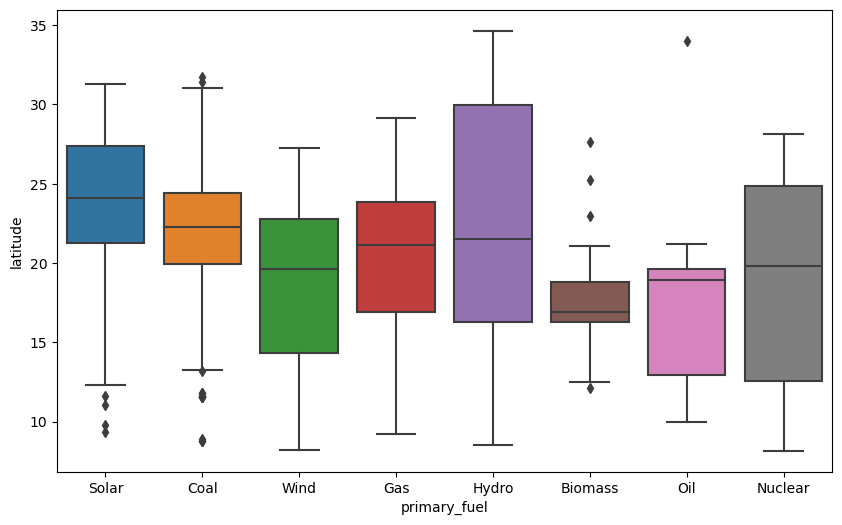

In [30]:
# Let's check how the primary_fuel is reated to latitude of the power plant
plt.figure(figsize=[10,6])
a = sns.boxplot(df['primary_fuel'],df["latitude"])
plt.show()

In [31]:
#Location is important feature specially for Nuclear powerplants. These plants lies in between 15 to 25 latitude and longitudnal range of 75 to 88 degree.

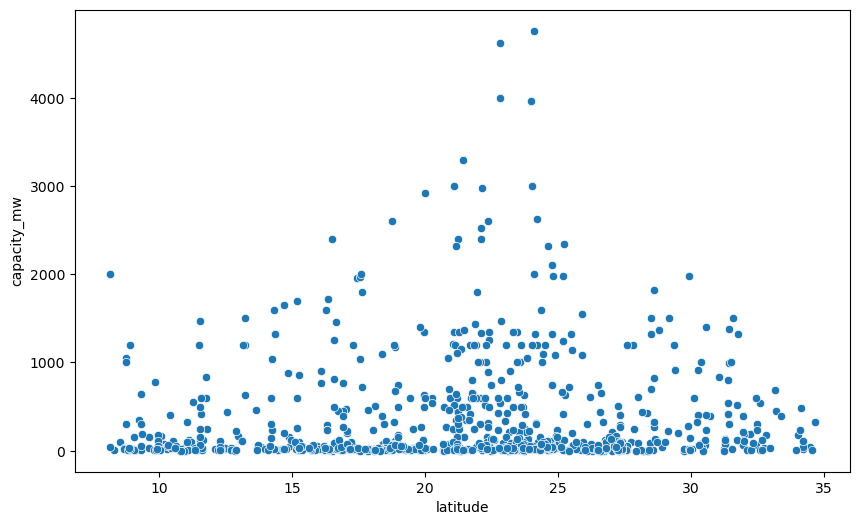

In [32]:
plt.figure(figsize=[10,6])
a= sns.scatterplot(df['latitude'],df["capacity_mw"])
plt.show()
# Let's check how the capacity is reated to latitude of the power plant

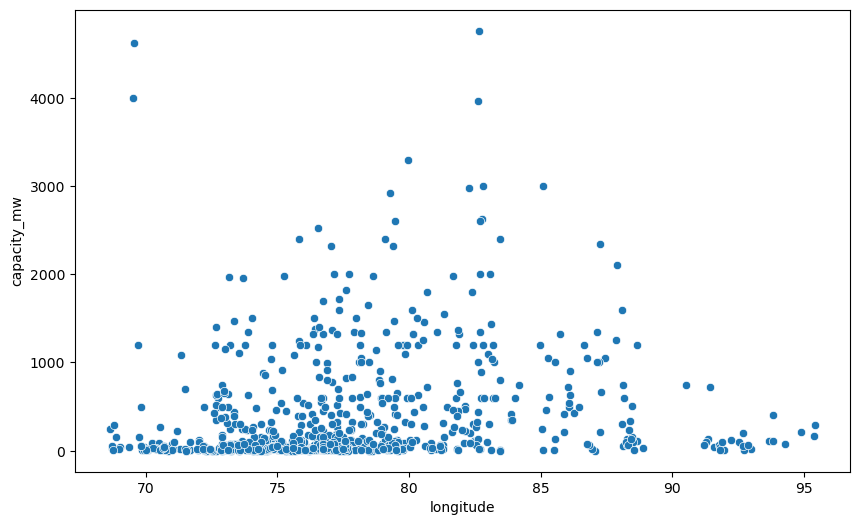

In [33]:
plt.figure(figsize=[10,6])
a= sns.scatterplot(df['longitude'],df["capacity_mw"])
plt.show()
# Let's check how the capacity is reated to longitude of the power plant

In [34]:
#Nothing significant insight gain from above plots

In [36]:
df['plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

# Lets extract power plant age from commissioning year by subtracting it from the year 2018

In [39]:
print(df.plant_age.max())
print(df.plant_age.min())


91.0
0.0


In [40]:
df.loc[df.plant_age==91]
#just checking location 

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,plant_age
728,SIVASAMUNDRUM,42.0,12.3082,77.165,Hydro,NaN,Central Electricity Authority,WRI,220.82035,215.3777,144.4143,175.92595,282.76905,Central Electricity Authority,91.0


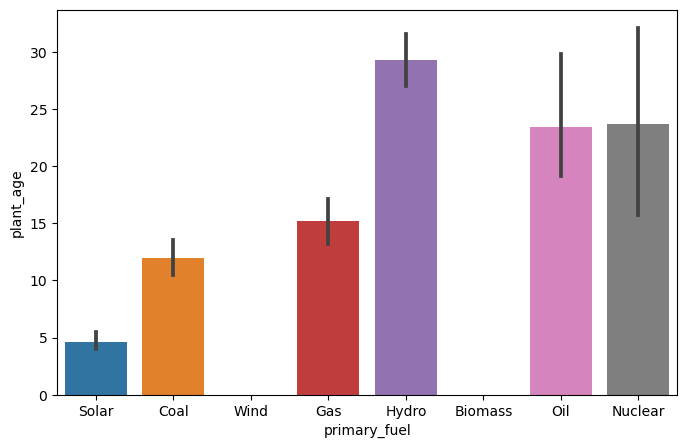

In [41]:
plt.figure(figsize = (8,5))
p = sns.barplot(x = "primary_fuel", y = "plant_age", data = df)
plt.show()
#Lets check how the power plant age affects Fuel Type

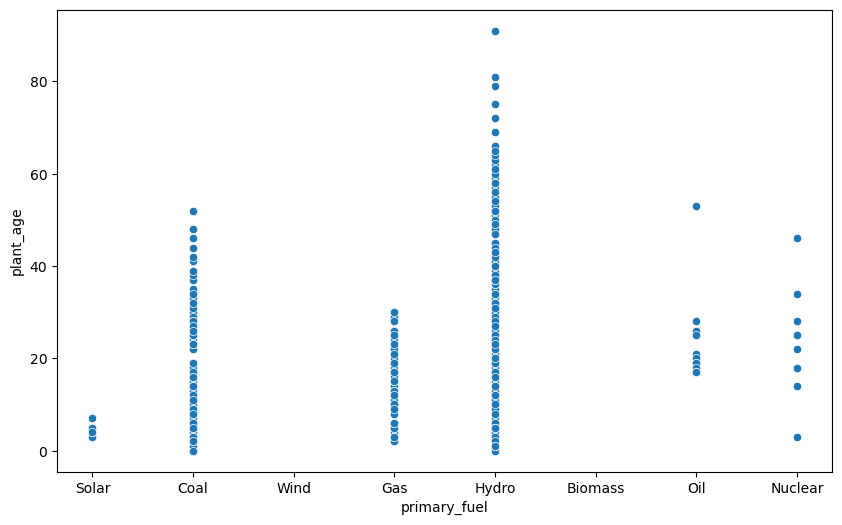

In [42]:
plt.figure(figsize=[10,6])
a= sns.scatterplot(df['primary_fuel'],df["plant_age"])
plt.show()
# Let's check how

<AxesSubplot:xlabel='plant_age', ylabel='capacity_mw'>

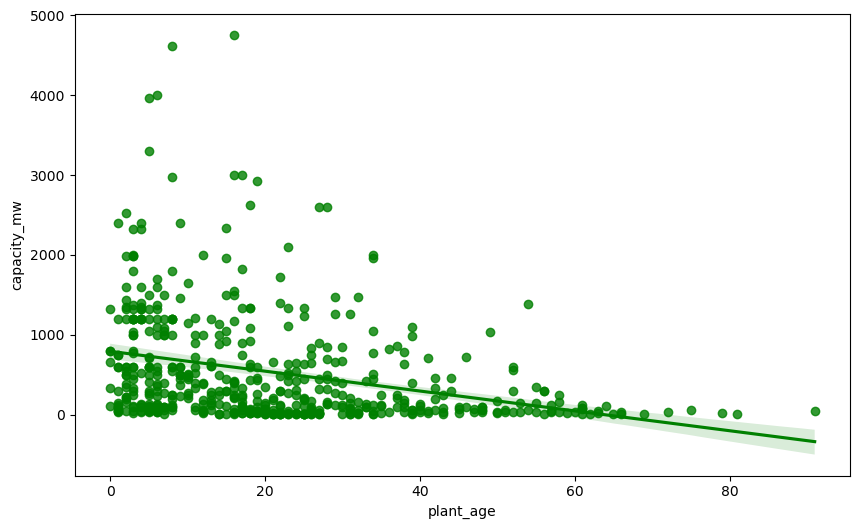

In [47]:


# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
sns.regplot(df['plant_age'],df['capacity_mw'],color = "g")
#There is negative linear relationship between feature and label.

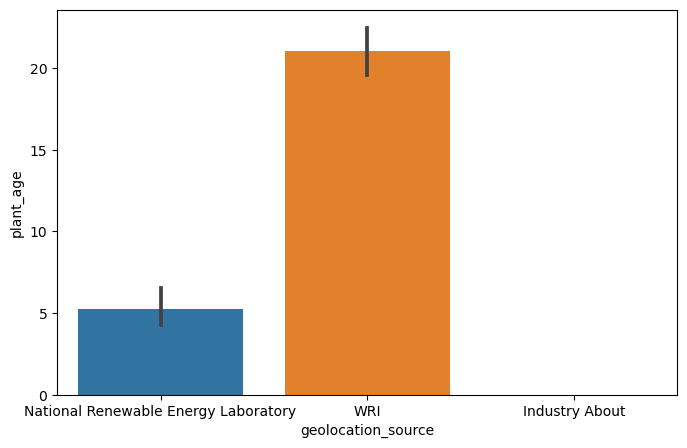

In [48]:
plt.figure(figsize = (8,5))
p = sns.barplot(x = "geolocation_source", y = "plant_age", data = df)
plt.show()

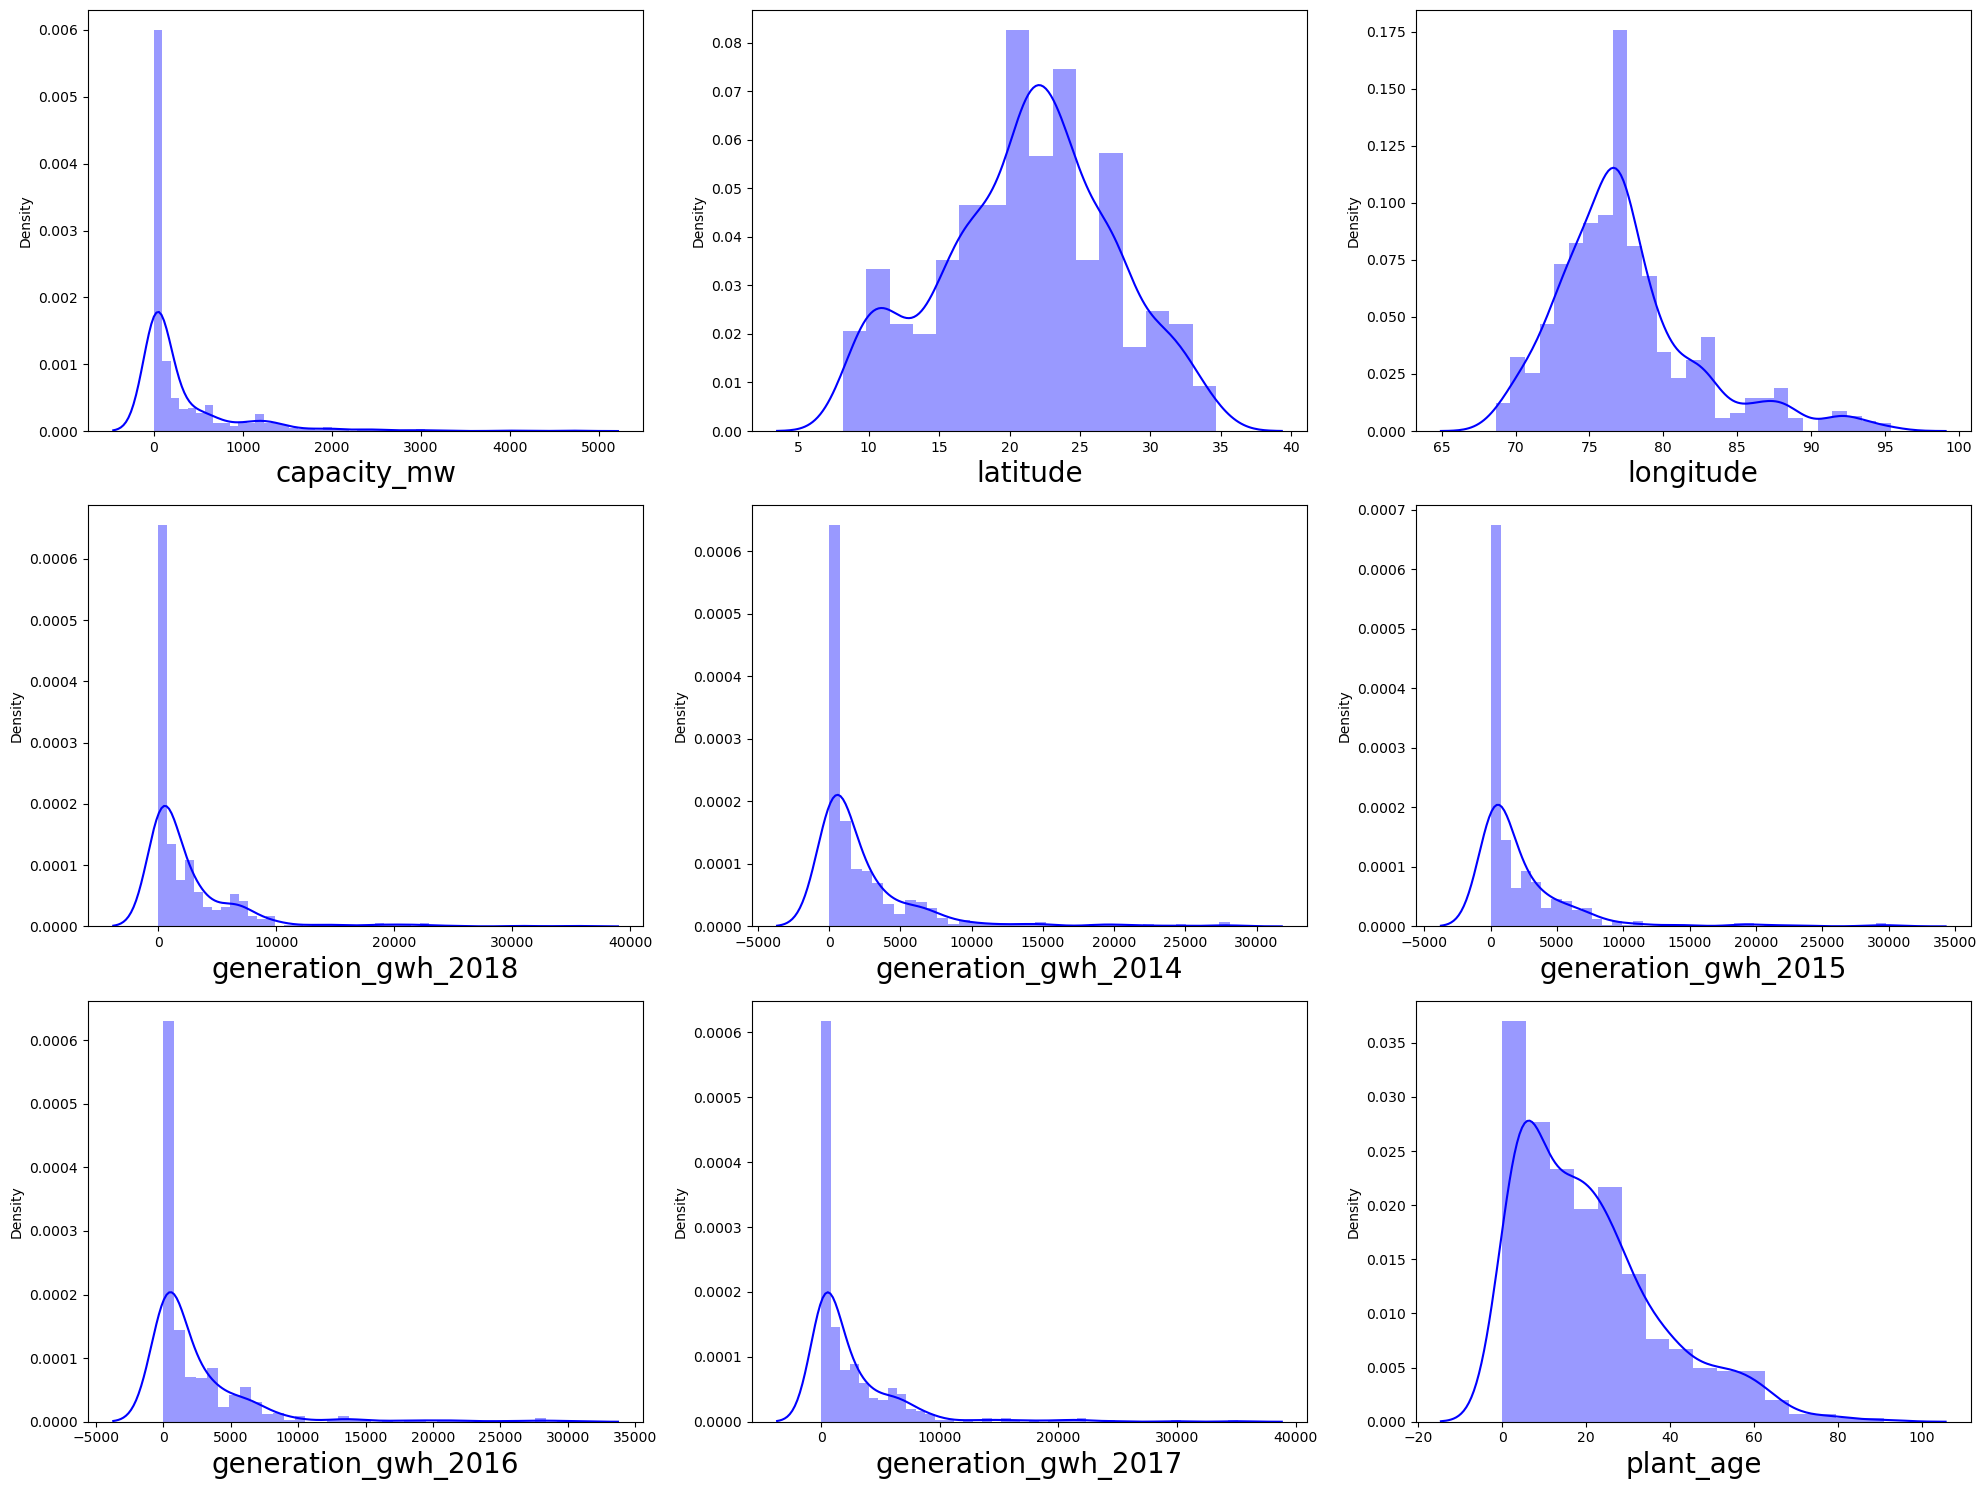

In [59]:
# Checking how the data has been distributed in each column
data=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2018', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'plant_age']
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()
#observe that the data is not normally distributed in all the columns except latitude and longitude.
#mean is greater than the median which means they are skewed to right.
#We will remove the skewness in all these columns except the label later.

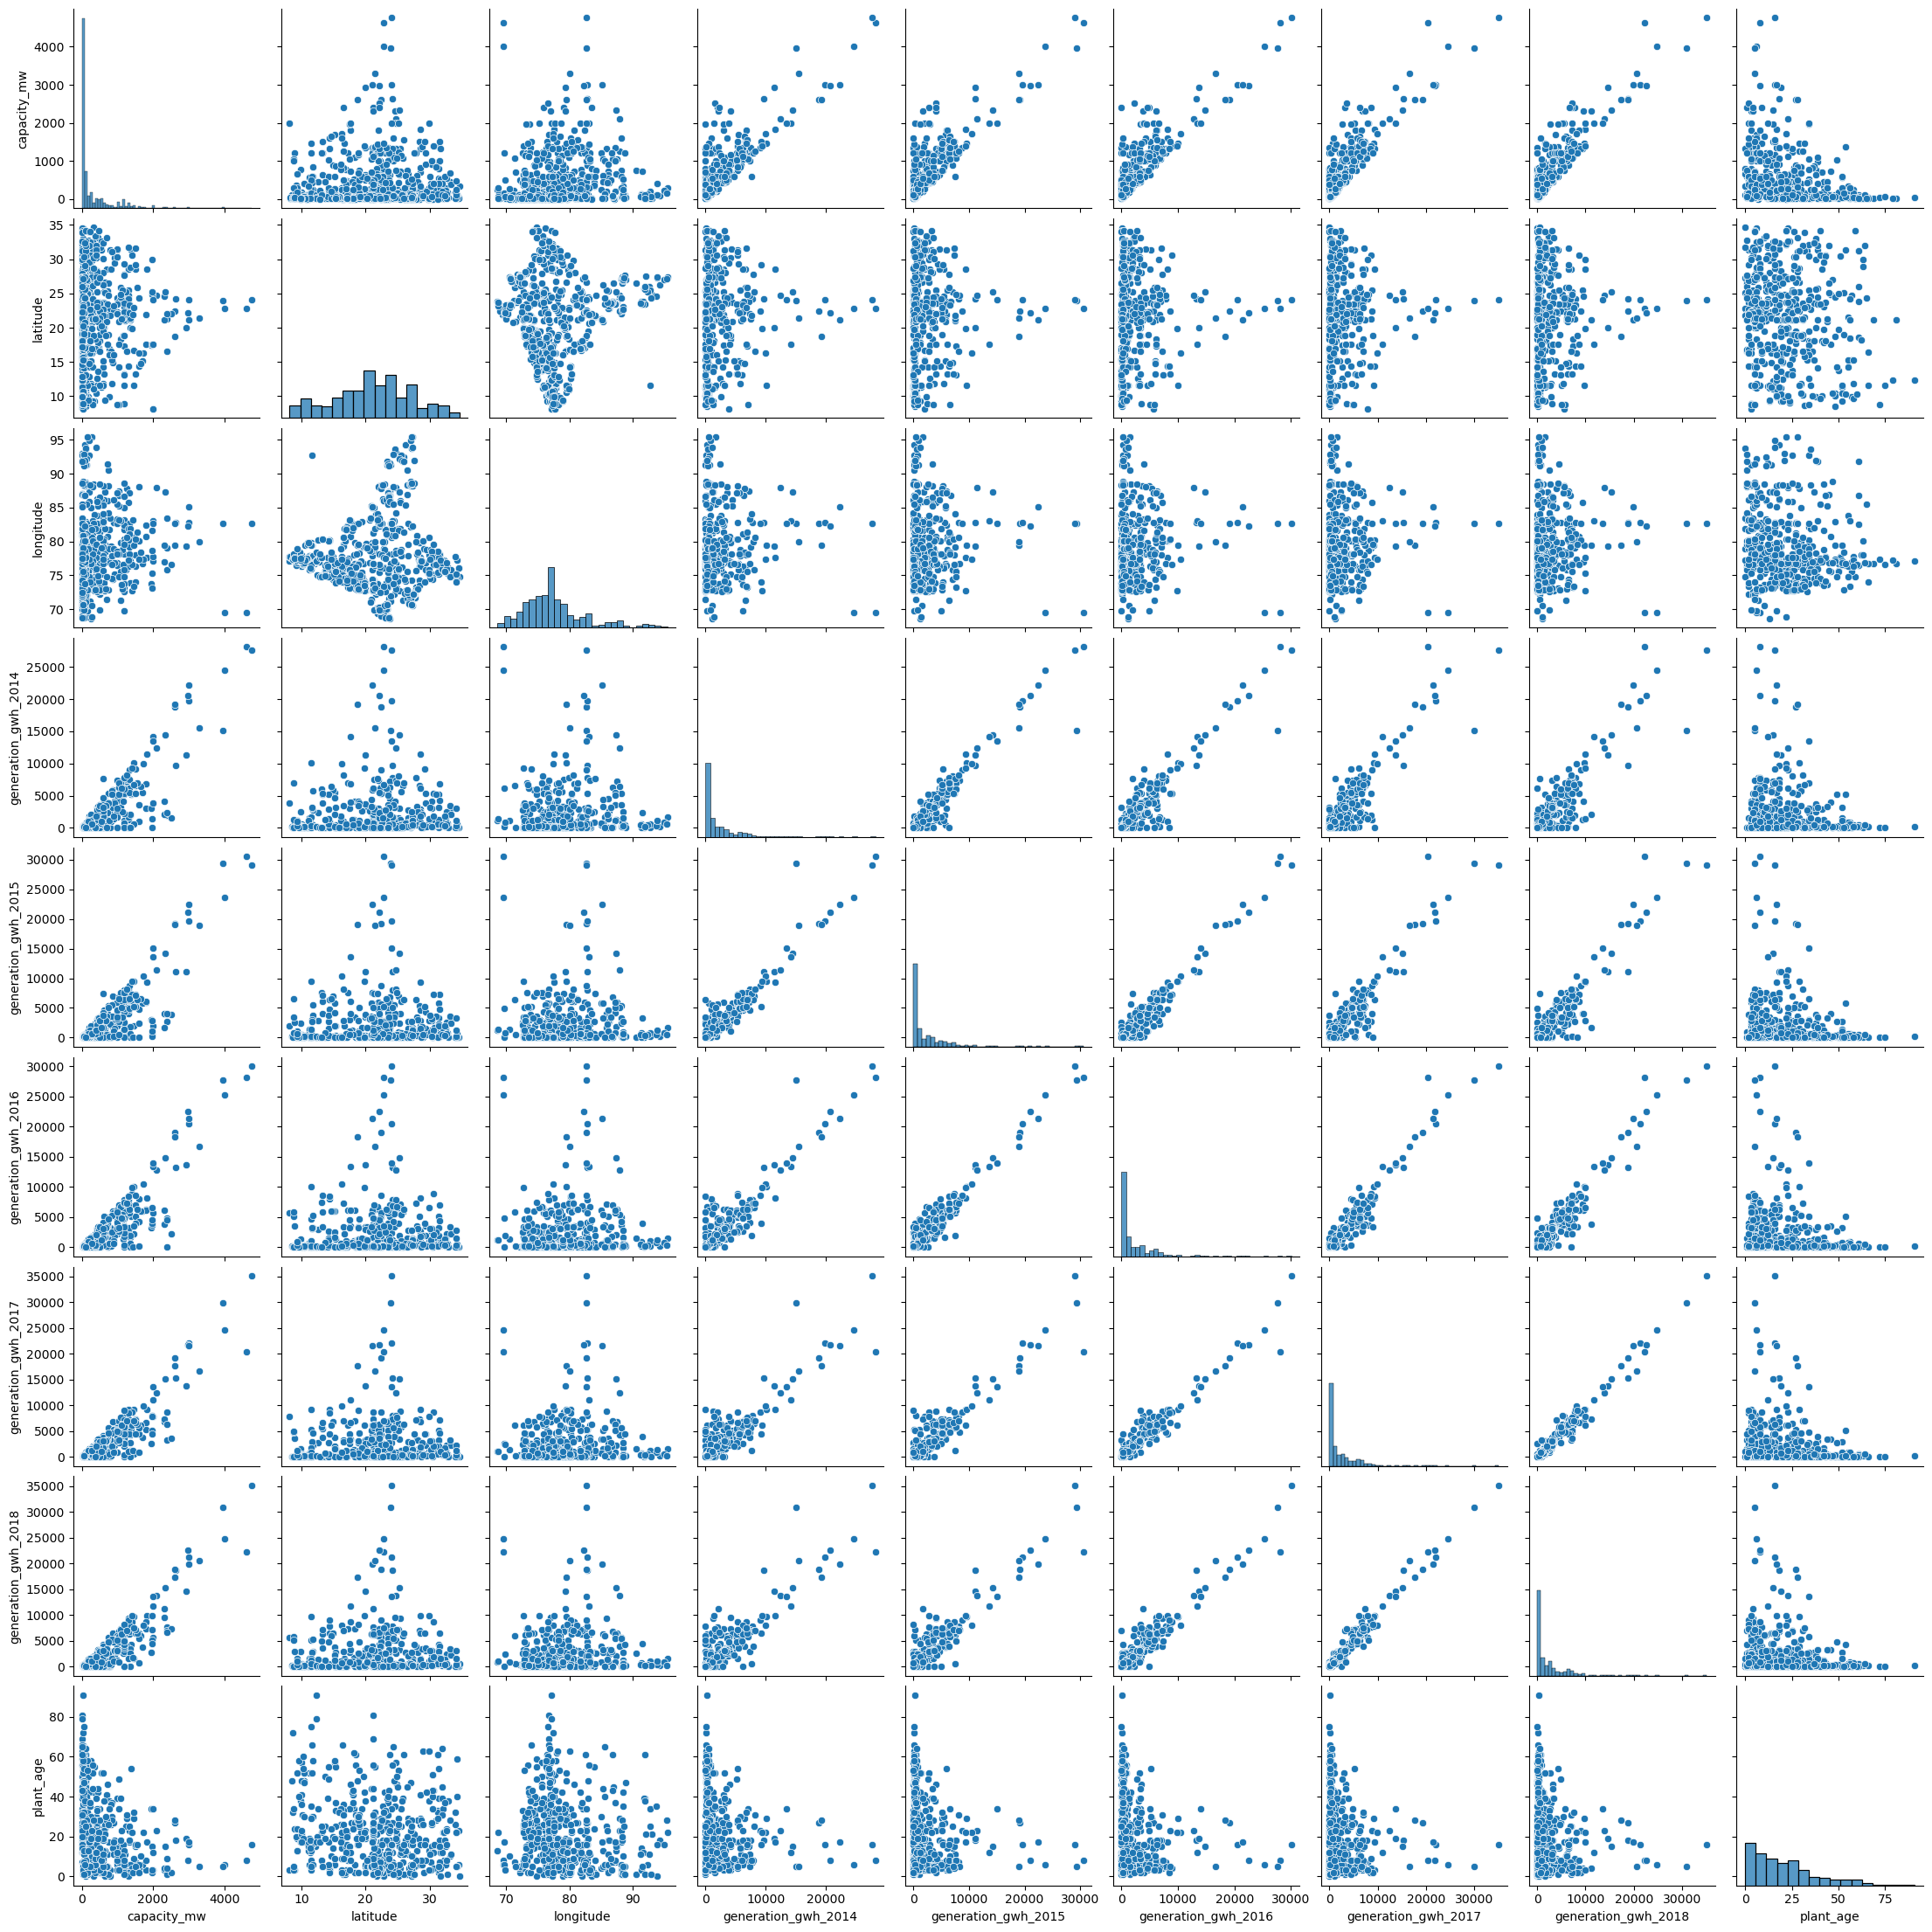

In [60]:
sns.pairplot(df)
#Most of the features have strong linear relationship and correlation with each other.
#plot we can observe the outliers in some of the columns.

In [61]:
df

,name,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,plant_age
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,NaN,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,7.0
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,NaN,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,14.0
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,WRI,NaN,0.994875,233.596650,865.400000,686.500000,Central Electricity Authority,2.0
903,Yelesandra Solar Power Plant,3.0,12.8932,78.1654,Solar,NaN,Karnataka Power Corporation Limited,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,Yelisirur wind power project,25.5,15.2758,75.5811,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,ZAWAR MINES,80.0,24.3500,73.7477,Coal,NaN,Hindustan Zinc ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df.drop(columns=['name'],axis=1,inplace=True)
#need to drop name that not required

In [64]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)
#need to drop generation_data_source that not required

In [65]:
category = ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']
# needs to change 

In [66]:

# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in category:
    df[i] = le.fit_transform(df[i])
df.head()  

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,2.5,28.1839,73.2407,6,3,109,1,NaN,NaN,NaN,NaN,NaN,7.0
1,98.0,24.7663,74.6090,1,3,174,2,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,7,3,21,2,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,2,3,22,2,617.789264,843.747,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,1,2,22,2,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,3.0


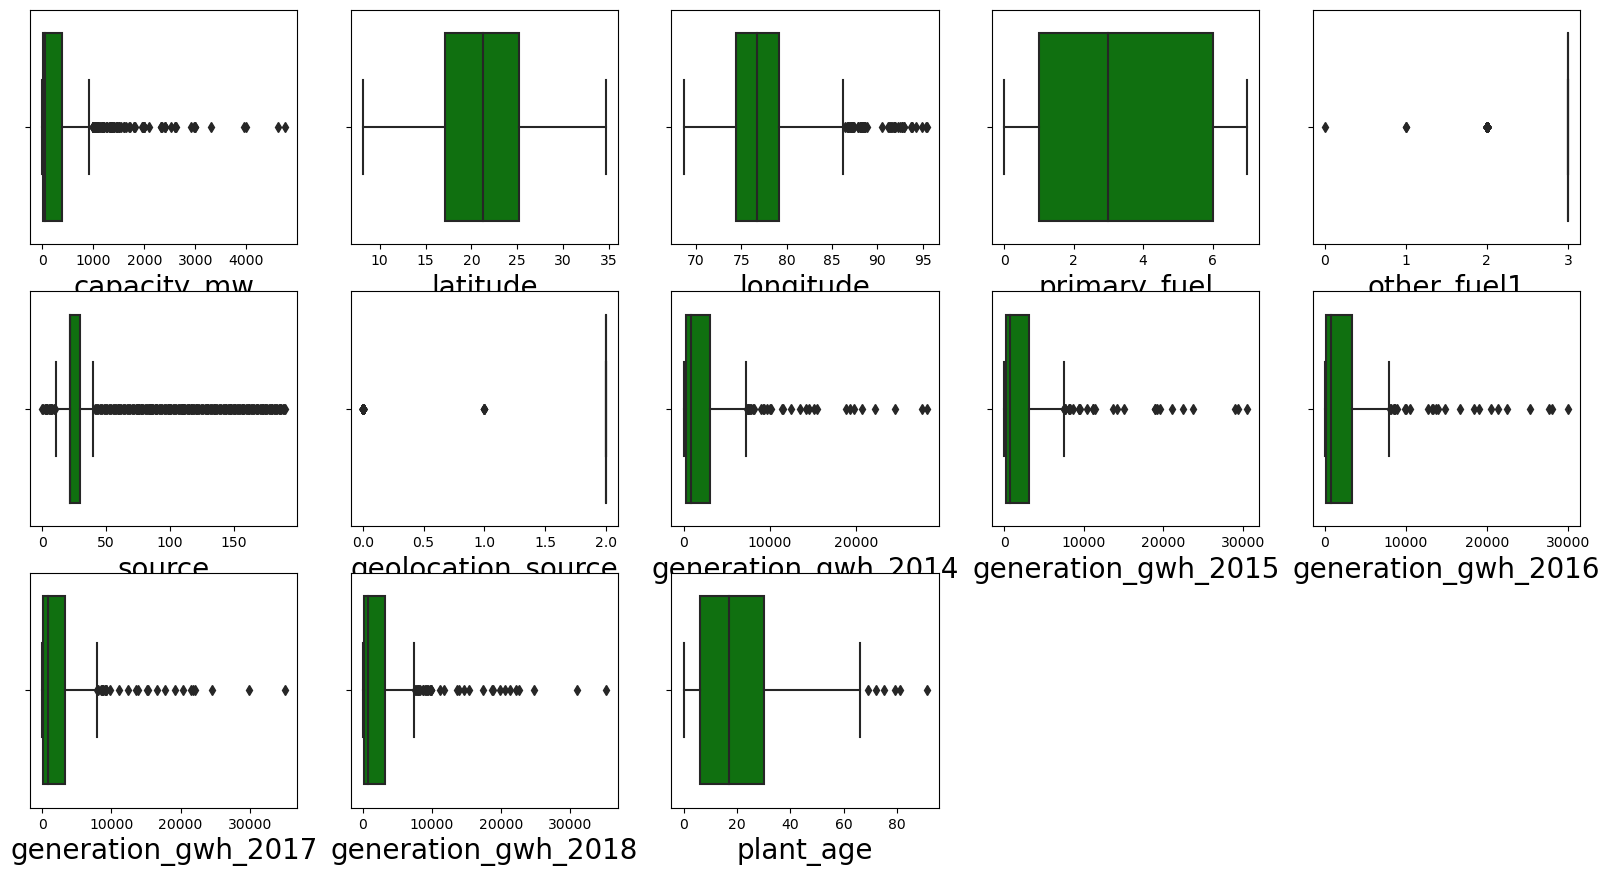

In [69]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<=15:
        ax=plt.subplot(7,5,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()
# outliers exist in data.
# no outliers in lower capping level.

In [70]:
# Removal of unnessary columns
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [71]:
#will restore original data for safet 
df2 = df.copy

In [77]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3 = df3.quantile(0.85)
IQR = Q3 - Q1

#Quantile-based Flooring and Capping technique.
#10th percentile for the lower and 0.75 percentile for the hiher value 

In [79]:
print(IQR)

capacity_mw             720.00000
latitude                 19.19886
longitude                13.30444
primary_fuel              6.00000
other_fuel1               3.00000
generation_gwh_2014    5295.18000
generation_gwh_2015    5094.78190
generation_gwh_2016    5246.84405
generation_gwh_2017    5631.03285
generation_gwh_2018    6014.95255
plant_age                39.00000
dtype: float64


In [80]:
data = df3[~((df3 < (Q1 -1.5 * IQR)) | (df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)
#after outltier this much data is left 

(877, 11)


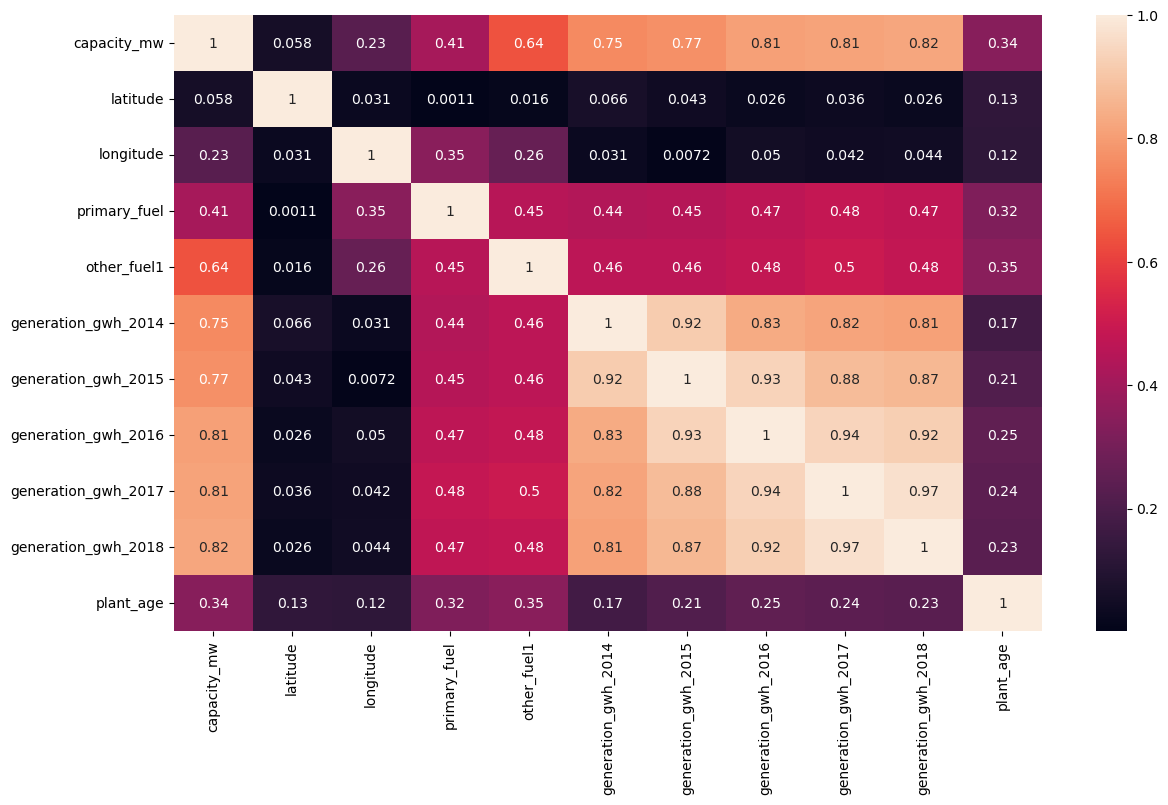

In [88]:
df_corr = data.corr().abs()

plt.figure(figsize=(14,8))
sns.heatmap(df_corr,annot=True)
plt.show()
# label capacity_mw is highly positively correlated with the features

In [100]:
data.skew()

capacity_mw            1.945405
latitude              -0.129362
longitude             -0.006448
primary_fuel           0.425807
other_fuel1           -1.533247
generation_gwh_2014   -0.035046
generation_gwh_2015   -0.036691
generation_gwh_2016   -0.036138
generation_gwh_2017   -0.037552
generation_gwh_2018   -0.035988
plant_age              0.011483
dtype: float64

In [101]:
#will write which data is skewed
skew = ['longitude','other_fuel1','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','plant_age']

In [102]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
#PowerTransformer method to remove skewness

In [103]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

,longitude,other_fuel1,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,plant_age
0,-0.933319,0.493935,NaN,NaN,NaN,NaN,NaN,-0.811778
1,-0.515778,0.493935,NaN,NaN,NaN,NaN,NaN,NaN
2,-2.419017,0.493935,NaN,NaN,NaN,NaN,NaN,NaN
3,2.161450,0.493935,-0.143435,0.076105,0.103688,-0.082486,-0.110805,-0.205869
4,1.146770,-2.024558,0.916351,1.493013,1.537220,1.386509,1.660086,-1.348377


In [105]:
data.skew()
#skew need has been treated

capacity_mw            1.945405
latitude              -0.129362
longitude             -0.006052
primary_fuel           0.425807
other_fuel1           -1.533247
generation_gwh_2014   -0.029317
generation_gwh_2015   -0.027782
generation_gwh_2016   -0.027594
generation_gwh_2017   -0.026265
generation_gwh_2018   -0.025761
plant_age              0.019176
dtype: float64

In [107]:
data.drop('other_fuel1',axis=1,inplace=True)
#  drop other fuel as result of poor correlation and lot of missing value

In [108]:
# Missing Value Imputation of latitude with mean
data['plant_age'] = data['plant_age'].fillna(data['plant_age'].mean()) 

In [109]:
#Since we have done with EDA NOW its time for removal of missing data
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)
data.drop("generation_gwh_2018",axis=1,inplace=True)

In [131]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge,LassoCV , RidgeCV,Lasso 

from xgboost import XGBRegressor    
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , confusion_matrix,roc_curve,roc_auc_score
#all the necassary liabraries that required for building a model

In [122]:
# Splitting data in target and  feature
x =  data.drop(['primary_fuel'],axis=1)
y =data['primary_fuel']

In [123]:
scaler= StandardScaler()
X_scaler = scaler.fit_transform(x)

In [124]:
#train test split , splitting the data 
x_train, x_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state=12)

In [126]:
# defined a funcution 
def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        
        
        print('============trainresult===============')
        
        print(f'accuracy_score{accuracy_score(y_train,y_pred) *  100:.2f}%' )
        
    elif train == False:
        
        pred = clf.predict(x_test)
        
        print('============testresult===============')
        
        print(f'accuracy_score {accuracy_score(y_test,pred)* 100:.2f}%')
        
        print(classification_report(y_test,pred,digits = 2))

In [127]:
#creating an object of logistic regression model
log = LogisticRegression()

log.fit(x_train,y_train)
y_pred = log.predict_proba(x_test)
y_pred

array([[6.37329012e-03, 1.39722902e-01, 7.09631127e-02, ...,
        2.78711615e-02, 5.10065415e-03, 1.65028603e-02],
       [1.02094065e-01, 9.73659890e-02, 6.74337205e-02, ...,
        4.49705802e-02, 1.74123216e-01, 3.65665487e-01],
       [7.98304673e-03, 1.62299207e-01, 4.80988744e-02, ...,
        2.59169940e-03, 5.10854799e-02, 5.50728762e-03],
       ...,
       [1.60113393e-01, 1.32382213e-01, 9.20082643e-02, ...,
        4.89689156e-02, 6.03721680e-02, 3.23394932e-01],
       [8.41812597e-03, 5.58454900e-01, 1.34845345e-01, ...,
        1.65464032e-03, 2.15299337e-01, 2.01302157e-02],
       [1.53983271e-03, 4.29301774e-02, 1.29667784e-02, ...,
        9.94268504e-04, 1.94496138e-03, 4.85499443e-04]])

In [128]:
metric_score(log,x_train,x_test,y_train,y_test,train = True)
metric_score(log,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score51.64%
============testresult===============
accuracy_score 55.68%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.75      0.68      0.71        53
           2       0.00      0.00      0.00        10
           3       0.48      0.70      0.57        44
           5       0.00      0.00      0.00         5
           6       0.56      0.54      0.55        26
           7       0.45      0.65      0.53        26

    accuracy                           0.56       176
   macro avg       0.32      0.37      0.34       176
weighted avg       0.49      0.56      0.52       176



In [129]:
cv_score = (cross_val_score(log, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check 

Cross Validation Score: 45.612987012987006


In [132]:
#DecisionTreeClassifier model
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred = clf.predict_proba(x_test)
y_pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [133]:
metric_score(clf,x_train,x_test,y_train,y_test,train = True)
metric_score(clf,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score100.00%
============testresult===============
accuracy_score 69.89%
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.69      0.72      0.70        53
           2       0.12      0.10      0.11        10
           3       0.80      0.75      0.78        44
           4       0.00      0.00      0.00         0
           5       0.50      0.60      0.55         5
           6       0.71      0.65      0.68        26
           7       0.77      0.77      0.77        26

    accuracy                           0.70       176
   macro avg       0.54      0.56      0.55       176
weighted avg       0.70      0.70      0.70       176



In [134]:
cv_score = (cross_val_score(clf, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check 

Cross Validation Score: 67.62272727272727


In [135]:
#hyper parameter tunning 
grid_params = {'criterion':['gini','entropy'],
              'max_depth':range(12,15),
              'min_samples_leaf':range(4,6),
              'min_samples_split':range(3,5),
              'max_leaf_nodes':range(5,10)}

grid = GridSearchCV(estimator=clf,
                   param_grid = grid_params,
                   cv = 5)


In [136]:
#time to train the data for best paraam and get best out of it
grid.fit(x_train,y_train)
best = grid.best_params_
best

{'criterion': 'gini',
 'max_depth': 12,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [137]:
d_t = DecisionTreeClassifier(criterion= 'gini', max_depth= 12,max_leaf_nodes=9 ,min_samples_leaf= 4,min_samples_split=3)
d_t.fit(x_train,y_train)
#best params and traning data

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=9, min_samples_leaf=4,
                       min_samples_split=3)

In [138]:
metric_score(d_t,x_train,x_test,y_train,y_test,train = True)
metric_score(d_t,x_train,x_test,y_train,y_test,train = False)
#afterbest params result got better DecisionTreeClassifier

============trainresult===============
accuracy_score61.48%
============testresult===============
accuracy_score 67.61%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.76      0.79      0.78        53
           2       0.00      0.00      0.00        10
           3       0.72      0.82      0.77        44
           5       0.00      0.00      0.00         5
           6       0.69      0.85      0.76        26
           7       0.49      0.73      0.58        26

    accuracy                           0.68       176
   macro avg       0.38      0.46      0.41       176
weighted avg       0.58      0.68      0.62       176



In [139]:
#RandomForestClassifier model
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predict = RFC.predict(x_test)
predict

#Created the Random Forest Classifier Model and checked for it's evaluation metrics.

array([3, 2, 3, 3, 3, 0, 2, 1, 1, 3, 6, 1, 3, 1, 7, 3, 2, 1, 3, 7, 7, 3,
       7, 1, 6, 2, 6, 3, 3, 1, 6, 5, 6, 3, 2, 1, 3, 1, 7, 7, 7, 3, 1, 6,
       6, 1, 3, 7, 7, 1, 1, 7, 1, 1, 3, 0, 2, 2, 1, 3, 1, 3, 3, 0, 3, 1,
       7, 2, 7, 1, 1, 3, 3, 1, 1, 1, 6, 7, 1, 6, 3, 0, 1, 1, 7, 1, 3, 2,
       3, 6, 1, 7, 3, 0, 0, 3, 6, 1, 7, 1, 6, 6, 3, 5, 2, 1, 3, 3, 3, 3,
       1, 1, 1, 1, 0, 1, 6, 2, 1, 7, 3, 6, 7, 3, 7, 6, 3, 3, 1, 1, 1, 0,
       1, 7, 1, 1, 6, 1, 6, 3, 0, 0, 3, 7, 1, 1, 0, 3, 1, 0, 3, 3, 1, 0,
       5, 0, 7, 3, 1, 7, 6, 6, 0, 6, 3, 6, 6, 3, 7, 7, 1, 3, 3, 0, 3, 3])

In [140]:
metric_score(RFC,x_train,x_test,y_train,y_test,train = True)
metric_score(RFC,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score100.00%
============testresult===============
accuracy_score 78.41%
              precision    recall  f1-score   support

           0       0.69      0.92      0.79        12
           1       0.82      0.77      0.80        53
           2       0.36      0.40      0.38        10
           3       0.83      0.91      0.87        44
           5       0.67      0.40      0.50         5
           6       0.83      0.73      0.78        26
           7       0.84      0.81      0.82        26

    accuracy                           0.78       176
   macro avg       0.72      0.71      0.70       176
weighted avg       0.79      0.78      0.78       176



In [141]:
cv_score = (cross_val_score(RFC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 76.05714285714285


In [155]:
#hyper parameter tunning 
grid_params = {'criterion':['gini','entropy'],
              'max_depth':range(12,15),
              'min_samples_leaf':range(4,6),
              'min_samples_split':range(3,5),
              'max_leaf_nodes':range(5,10)}

grid = GridSearchCV(estimator=clf,
                   param_grid = grid_params,
                   cv = 5)

In [156]:
#time to train the data for best paraam and get best out of it
grid.fit(x_train,y_train)
best = grid.best_params_
best

{'criterion': 'gini',
 'max_depth': 12,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 4,
 'min_samples_split': 3}

In [157]:
RF = RandomForestClassifier(criterion= 'gini', max_depth= 12,max_leaf_nodes=9 ,min_samples_leaf= 4,min_samples_split=3)
RF.fit(x_train,y_train)
#best params and traning data

RandomForestClassifier(max_depth=12, max_leaf_nodes=9, min_samples_leaf=4,
                       min_samples_split=3)

In [158]:
metric_score(RF,x_train,x_test,y_train,y_test,train = True)
metric_score(RF,x_train,x_test,y_train,y_test,train = False)
#afterbest params result got better RandomForestClassifier

============trainresult===============
accuracy_score69.47%
============testresult===============
accuracy_score 71.02%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.76      0.83      0.79        53
           2       0.00      0.00      0.00        10
           3       0.74      0.91      0.82        44
           5       0.00      0.00      0.00         5
           6       0.80      0.77      0.78        26
           7       0.54      0.81      0.65        26

    accuracy                           0.71       176
   macro avg       0.41      0.47      0.43       176
weighted avg       0.61      0.71      0.65       176



In [142]:
# KNeighborsClassifier model
KNC = KNeighborsClassifier(n_neighbors=12)
KNC.fit(x_train,y_train)
y_pred = log.predict_proba(x_test)
y_pred
#Created the K Neighbors Classifier Model and checked for it's evaluation metrics.
# tried with many numbers n_neighbors but getting best accurancy with !% hence done ith that

array([[6.37329012e-03, 1.39722902e-01, 7.09631127e-02, ...,
        2.78711615e-02, 5.10065415e-03, 1.65028603e-02],
       [1.02094065e-01, 9.73659890e-02, 6.74337205e-02, ...,
        4.49705802e-02, 1.74123216e-01, 3.65665487e-01],
       [7.98304673e-03, 1.62299207e-01, 4.80988744e-02, ...,
        2.59169940e-03, 5.10854799e-02, 5.50728762e-03],
       ...,
       [1.60113393e-01, 1.32382213e-01, 9.20082643e-02, ...,
        4.89689156e-02, 6.03721680e-02, 3.23394932e-01],
       [8.41812597e-03, 5.58454900e-01, 1.34845345e-01, ...,
        1.65464032e-03, 2.15299337e-01, 2.01302157e-02],
       [1.53983271e-03, 4.29301774e-02, 1.29667784e-02, ...,
        9.94268504e-04, 1.94496138e-03, 4.85499443e-04]])

In [143]:
metric_score(KNC,x_train,x_test,y_train,y_test,train = True)
metric_score(KNC,x_train,x_test,y_train,y_test,train = False)

============trainresult===============
accuracy_score68.62%
============testresult===============
accuracy_score 67.05%
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        12
           1       0.69      0.79      0.74        53
           2       0.25      0.20      0.22        10
           3       0.83      0.77      0.80        44
           5       0.00      0.00      0.00         5
           6       0.79      0.58      0.67        26
           7       0.54      0.73      0.62        26

    accuracy                           0.67       176
   macro avg       0.51      0.51      0.51       176
weighted avg       0.66      0.67      0.66       176



In [144]:
cv_score = (cross_val_score(KNC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 48.00779220779221


In [145]:
#hyper parameter traning
param = {'algorithm': ['kd_tree','brute'],
        'leaf_size':[3,4,5,6,7,9],
        'n_neighbors' : [2,3,4,5,6,7]
        }
grid = GridSearchCV(estimator = KNC,param_grid=param)
grid.fit(x_train,y_train)
grid.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 3, 'n_neighbors': 3}

In [146]:
#best tuning
knn = KNeighborsClassifier(algorithm = 'kd_tree', leaf_size=3, n_neighbors= 3)

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3, n_neighbors=3)

In [147]:
metric_score(knn,x_train,x_test,y_train,y_test,train=False)

metric_score(knn,x_train,x_test,y_train,y_test,train=True)

============testresult===============
accuracy_score 74.43%
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.77      0.77      0.77        53
           2       0.40      0.40      0.40        10
           3       0.82      0.82      0.82        44
           4       0.00      0.00      0.00         0
           5       0.33      0.20      0.25         5
           6       0.72      0.69      0.71        26
           7       0.78      0.81      0.79        26

    accuracy                           0.74       176
   macro avg       0.57      0.57      0.57       176
weighted avg       0.74      0.74      0.74       176

============trainresult===============
accuracy_score81.17%


In [148]:
# GradientBoostingClassifier model
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_pred = GBC.predict_proba(x_test)
y_pred

array([[4.19898267e-04, 6.83106919e-02, 1.15589194e-02, ...,
        4.12316232e-04, 4.63025070e-03, 3.40142215e-02],
       [8.43493205e-03, 3.27181708e-01, 1.20447465e-01, ...,
        5.46702624e-03, 5.91408912e-02, 4.66303830e-01],
       [8.42284050e-04, 2.04316281e-01, 1.49594307e-01, ...,
        2.49918694e-03, 9.32645089e-03, 1.82367452e-03],
       ...,
       [3.89394676e-01, 2.75855983e-01, 4.36079219e-02, ...,
        7.73894059e-03, 2.95253251e-02, 2.35684508e-01],
       [1.41020568e-03, 2.91290310e-01, 4.78938955e-01, ...,
        1.76238379e-04, 2.32110343e-02, 7.58223477e-03],
       [1.56246308e-04, 5.03320269e-02, 7.69330425e-04, ...,
        1.24950974e-04, 2.45119542e-03, 2.19945308e-04]])

In [149]:
metric_score(GBC,x_train,x_test,y_train,y_test,train = True)
metric_score(GBC,x_train,x_test,y_train,y_test,train = False)
##Created the GradientBoostingClassifir

============trainresult===============
accuracy_score99.00%
============testresult===============
accuracy_score 73.30%
              precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.82      0.77      0.80        53
           2       0.25      0.10      0.14        10
           3       0.76      0.93      0.84        44
           4       0.00      0.00      0.00         0
           5       0.50      0.40      0.44         5
           6       0.76      0.73      0.75        26
           7       0.70      0.73      0.72        26

    accuracy                           0.73       176
   macro avg       0.54      0.52      0.53       176
weighted avg       0.72      0.73      0.72       176



In [150]:
from sklearn.svm import SVC
# Support Vector Machines
svmMod = SVC()
svmMod.fit(x_train,y_train)
y_pred = svmMod.predict(x_test)
y_pred

array([3, 7, 3, 3, 7, 1, 2, 3, 1, 3, 6, 1, 3, 1, 7, 3, 7, 1, 1, 7, 7, 1,
       7, 1, 6, 7, 6, 1, 1, 1, 1, 7, 7, 1, 2, 1, 3, 1, 7, 1, 7, 3, 1, 7,
       6, 1, 1, 7, 7, 1, 1, 7, 1, 1, 3, 7, 3, 7, 1, 1, 6, 7, 3, 7, 3, 1,
       7, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 7, 1, 1, 3, 7, 1, 1, 7, 1, 3, 1,
       3, 6, 1, 7, 3, 7, 7, 1, 6, 6, 7, 1, 6, 6, 3, 7, 7, 1, 3, 3, 3, 3,
       1, 1, 1, 1, 7, 1, 6, 3, 3, 7, 3, 6, 7, 3, 1, 7, 3, 3, 1, 1, 1, 7,
       1, 7, 1, 3, 7, 1, 6, 3, 7, 7, 3, 7, 1, 1, 7, 3, 7, 7, 1, 3, 1, 7,
       1, 7, 7, 3, 1, 7, 6, 7, 7, 7, 1, 1, 7, 3, 6, 6, 1, 3, 3, 7, 3, 3])

In [151]:
metric_score(svmMod,x_train,x_test,y_train,y_test,train = True)
metric_score(svmMod,x_train,x_test,y_train,y_test,train = False)
#SVC with function 


============trainresult===============
accuracy_score60.77%
============testresult===============
accuracy_score 61.36%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.65      0.79      0.71        53
           2       0.00      0.00      0.00        10
           3       0.80      0.75      0.78        44
           5       0.00      0.00      0.00         5
           6       0.75      0.46      0.57        26
           7       0.40      0.81      0.54        26

    accuracy                           0.61       176
   macro avg       0.37      0.40      0.37       176
weighted avg       0.57      0.61      0.57       176



In [152]:
# BaggingClassifier model
from sklearn.ensemble import BaggingClassifier
BC = BaggingClassifier()
BC.fit(x_train,y_train)
y_pred = BC.predict_proba(x_test)
y_pred

array([[0. , 0.2, 0. , ..., 0.1, 0. , 0. ],
       [0. , 0. , 0.4, ..., 0.4, 0. , 0.2],
       [0. , 0. , 0. , ..., 0.2, 0. , 0. ],
       ...,
       [0.8, 0.1, 0. , ..., 0. , 0. , 0.1],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0.3, 0. , ..., 0. , 0. , 0. ]])

In [153]:
metric_score(BC,x_train,x_test,y_train,y_test,train = True)
metric_score(BC,x_train,x_test,y_train,y_test,train = False)
##Created the BaggingClassifier

============trainresult===============
accuracy_score98.72%
============testresult===============
accuracy_score 78.41%
              precision    recall  f1-score   support

           0       0.67      0.83      0.74        12
           1       0.80      0.83      0.81        53
           2       0.33      0.40      0.36        10
           3       0.87      0.89      0.88        44
           5       0.50      0.20      0.29         5
           6       0.86      0.73      0.79        26
           7       0.84      0.81      0.82        26

    accuracy                           0.78       176
   macro avg       0.70      0.67      0.67       176
weighted avg       0.79      0.78      0.78       176



In [154]:
cv_score = (cross_val_score(BC, x, y, cv=5).mean())*100
print("Cross Validation Score:", cv_score)
#cross validation score check  

Cross Validation Score: 73.89155844155843


In [ ]:
#final model we have selected which is RandomForestClassifier becuase after hyperparameter tuning it gives best reult in term of percentage performance .